In [1]:
import torch
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [2]:
total_perform_z = torch.load('/home/svcapp/userdata/dev/virtuosoNet/style_encoded.pt', map_location='cpu')


In [3]:
len(total_perform_z[0]['E1'])

11

In [4]:
selected_z = np.asarray([z for x in total_perform_z for y in ['E1', 'E2', 'E3', 'E4', 'E5'] for z in x[y]])
# selected_z = selected_z.reshape(len(total_perform_z), 5, 11, -1)
z_embedded = TSNE(n_components=2).fit_transform(selected_z)


In [56]:
num_sample_per_performances=11
z_reshaped = selected_z.reshape(len(total_perform_z), 5, 11, -1)
mean_z = np.mean(z_reshaped[:,0,:,:], axis=1)
normalized_z = z_reshaped - mean_z.reshape(len(total_perform_z), 1, 1, -1)
normalized_z = normalized_z.reshape(len(total_perform_z) * 5 * num_sample_per_performances, -1)
tsne_normalized = TSNE(n_components=2).fit_transform(normalized_z)
tsne_normalized = tsne_normalized.reshape(len(total_perform_z), 5, num_sample_per_performances, -1)


In [6]:
z_embedded = z_embedded.reshape(len(total_perform_z), 5, 11, -1)

In [19]:
z_embedded

array([[[[-26.89239   ,  22.833735  ],
         [ 36.589188  , -18.664026  ],
         [ 22.719595  , -21.444025  ],
         ...,
         [ -0.9165161 , -67.44846   ],
         [ 27.916761  ,   1.6086831 ],
         [ 29.365562  ,  -8.150177  ]],

        [[-24.884275  ,   2.0920403 ],
         [ 54.28666   ,  -9.131045  ],
         [-55.746445  ,   7.6424193 ],
         ...,
         [-45.73533   ,   0.4437453 ],
         [-34.04583   , -46.820766  ],
         [-16.702944  ,  51.11564   ]],

        [[-19.094164  ,  -4.104062  ],
         [ 65.43159   ,  27.940586  ],
         [ 51.597504  ,  28.447313  ],
         ...,
         [-31.248589  ,  -9.611007  ],
         [-48.39273   ,  30.438229  ],
         [-45.205544  ,  41.131367  ]],

        [[-14.876704  , -14.757152  ],
         [ 38.694473  ,  30.024244  ],
         [ 21.033878  , -51.496773  ],
         ...,
         [-12.205501  , -29.813446  ],
         [-50.39989   ,  15.197649  ],
         [  8.250391  ,   5.7800107 ]],



No handles with labels found to put in legend.


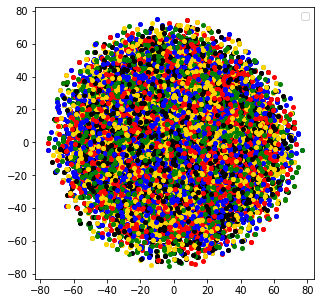

In [17]:
plt.figure(figsize=(5,5))
colors = ['black', 'green', 'gold', 'blue', 'red']
perf_names = ['Orig', 'Relax', 'Sad', 'Joyful', 'Angry']
[plt.scatter(z_embedded[i,j,k,0], z_embedded[i,j,k,1] , c=colors[j], s=16) for i in range(220) for j in range(5) for k in range(11)]

# for i, x in enumerate(data):
#     performer_class_idx = perf_name_dic.index(perf_names[i])
#     plt.scatter(x[0], x[1], c=colors[performer_class_idx], label=perf_names[i])

plt.legend()
# for i, txt in enumerate(perf_names):
#     plt.annotate(txt, (data[i,0], data[i,1]))
# plt.savefig(output_name)
